Notebook editado a partir del material de [Donne Martin](http://donnemartin.com). Link al material original [GitHub](https://github.com/donnemartin/data-science-ipython-notebooks).

# Predicción de la probabilidad de supervivencia en el titanic

* Descripción
* Datos
* Variables
* Exploración
* En busca del dato perdido
* La familia importa
* Señora o señorita, ¿a caso importa?
* Preparación de los datos
* Enseñando a tu primer modelo
* Haz tu propio modelo
* Crea tus propias variables

## Descripción

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

El hundimiento del RMS Titanic es uno de los más famosos e infames naufragios en la historia. El 15 de abril de 1912, en su viaje inaugural, el buque que se tenía como imposible de hundir, faltó a su promesa al colisionar contra un iceberg, muriendo 1502 de los 2224 pasajeros y tripulación. Esta tragedia commocionó al mundo, habiendose realizado libros, teatros, museos y hasta una pelicula, siendo Titanic una de las películas más taquilleras de todos los tiempos.

Una de las principales razones por las que la tragedia costó un número tan elevado de vidas es porque no había suficientes botes de supervivencia para todos los pasajeros. Llevando a que la suerte y en otros casos factores como el sexo del pasajero o su clase social, influyeran enormemente en las probabilidades de supervivencia.

Es por eso que en este reto vamos a intentar a partir de los datos de cada uno de los pasajeros predecir la probabilidad de que cada uno de ellos tendría de sobrevivir a esta tragedia.

## Datos

| Archivo          | Formato        |
|------------------|----------------|
| entrenamiento    | .csv (61 kb)   |

<pre>
Descripción de las variables:
survival        Supervivencia
                (0 = No; 1 = Sí)
pclass          Clase del pasajero
                (1 = primera; 2 = segunda; 3 = tercera)
name            Nombre
sex             Sexo
                (male=hombre, female=mujer)
age             Edad
sibsp           Número de hermanos/esposa abordo
parch           Número de padres/hijos abordo
ticket          Número de ticket
fare            Precio del billete
cabin           Cabina
embarked        Puerto de embarcación
                (C = Cherbourg; Q = Queenstown; S = Southampton)

Notas:
La clase del pasajero es una medida del nivel social y económico del pasajero, siendo los de la primera clase los más ricos y los de la tercera los menos pudientes.

La edad es en años, los pasajeros menores de 1 año se pone como una fracción, además en algunos casos algunos pasajeros no se sabe su edad pero se estima por algunos datos que tenemos sobre ellos, en esos casos la edad se pone como un número, pero con el decimal .5.

Con respecto a la familia, algunas relaciones familiares no se incluyeron o se agruparon dentro del mismo grupo:
    -Sibling: Hermano, hermana, hermanastros o hermanastras.
    -Spouse: Marido o mujer abordo.
    -Parent: Padre o madre entre los pasajeros.
    -Child: Hijo, hija o hijastros abordo del Titanic.

Otras relaciones como primos, sobrinos, nietos etc no fueron incluidos en el estudio. Algunos niños viajaron solo con una niñera y en esos casos la variable parch será 0 ya que no se consideró como que fueran acompañados de sus padres.

</pre>

## Variables

In [1]:
#Cargamos las funciones que vamos a usar para leer los datos y visualizarlos
#pandas es el principal paquete de python para leer y manejar los datos
import pandas as pd
#numpy es el paquete para modificar los datos y hacer uso de "arrays" que son conjuntos de datos
import numpy as np
#pylab y seaborn sirven para hacer las gráficas
import pylab as plt
import seaborn as sns

# Marcamos el tamaño que van a tener las figuras
plt.rc('figure', figsize=(10, 5))

# Marcamos el tamaño de las figuras multiples
fizsize_with_subplots = (15, 10)

# Determinar el número de particiones que habrá en los histogramas.
bin_size = 10

## Exploración

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Leemos los datos:

In [3]:
#Ahora usaremos pandas (pd) para leer el archivo .csv con los datos
df_train = pd.read_csv('/content/drive/MyDrive/titanic/entrenamiento.csv')
#Miramos los primeros registros
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora vamos a empezar a estudiar nuestros datos:

In [4]:
#Primero el tipo de datos que contiene cada variable
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-int64 significa que son números enteros (sin decimales)
-float64 son números con decimales
-object son aquellas variables que contienen texto.

Saber que tipo de datos tiene cada una de las variables es indispensable siempor que hagamos un análisis de datos, ya que no se trabaja igual con cada uno de los tipos y tendremos que trabajarlos de manera distinta. Además, los modelos de inteligencia artificial necesita que cambiemos todos los datos para estar representados de manera numérica.

**Vamos a obtener más información de nuestro "dataframe" que es como llamamos a la tabla de datos:**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que algunas de las variables tienen valores perdidos, valores que no se conocen y que tendremos que ver cuales podemos inferir y cuales tendremos que asumir que no son posibles de obtener.

Ahora veremos la media y otros parámetros estadísticos de las variables:

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Una vez que ya tenemos una pequeña idea de nuestros datos, comenzaremos a estudiarlos más en profundidad. Lo primero que haremos es generar unas gráficas para ver cómo se distribuye cada dato.

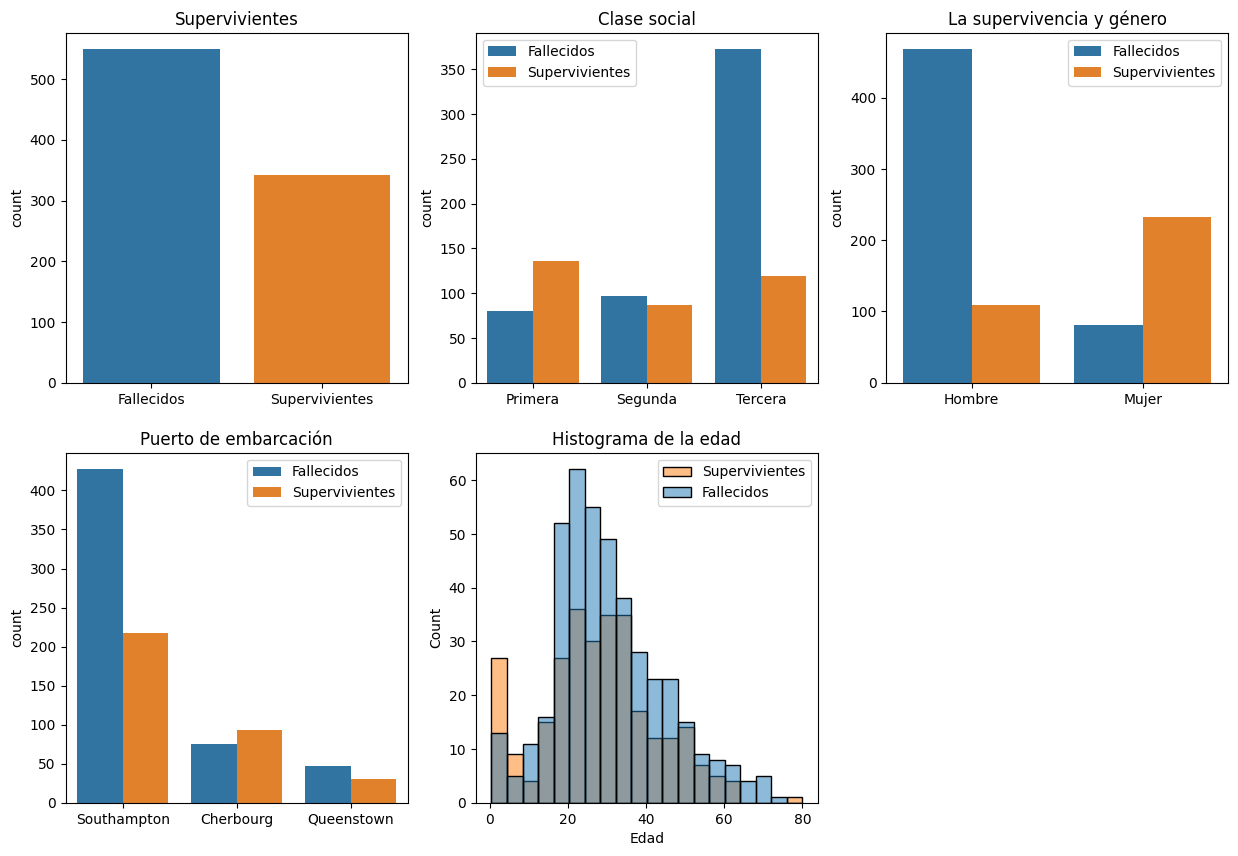

In [7]:
# Aquí marcamos que queremos una figura y de que tamaño.
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (2, 3)

# Lo primero es generar una figura de cuantos supervivientes hubieron
plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(data=df_train, x="Survived")
plt.xticks([0,1],['Fallecidos', 'Supervivientes'])
plt.title("Supervivientes")
plt.xlabel("")
# Posteriormente veremos como se distribuye las diferentes clases
plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.xticks([0,1,2],['Primera', "Segunda", 'Tercera'])
plt.title('Clase social')
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.xlabel("")
# Continuamos con el sexo
plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(data=df_train, x="Sex", hue="Survived")
plt.xticks([0,1],['Hombre', 'Mujer'])
plt.title('La supervivencia y género')
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
# Ahora los tipos de embarque
plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(data=df_train, x="Embarked", hue="Survived")
plt.xticks([0,1,2],['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Puerto de embarcación')
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
# Por último la edad
plt.subplot2grid(fig_dims, (1, 1))
sns.histplot(data=df_train, x="Age", hue="Survived")
plt.legend(['Supervivientes', 'Fallecidos'], title='')
plt.xticks(rotation=0)
plt.title('Histograma de la edad')
plt.xlabel("Edad")
plt.show()

**¿Cuál puede ser la explicación de que mujeres, niños y gente de clase alta tuviera mayor probabilidad de sobrevivir?**

Vemos varias cosas interesantes, lo primero es que hubo trágicamente, más fallecidos que supervivientes. Respecto a la clase social, vemos el primero de los factores que marcó la probabilidad de supervivencia de los pasajeros, teniendo mayor probabilidad de supervivencia aquellos que eran de clase más alta, siendo aquellos de tercera clase prácticamente condenados en esta tragedia.

En segundo lado, el sexo, al ser el año 1912, existía más aún una diferencia en el trato entre hombres y mujeres, dando preferencia para la entrada en los botes salvavidas a mujeres y a niños. Siendo las mujeres las que más sobrevivieron y siendo también los niños menores de 10 años, la franja de edad que mayor porcentaje de supervivencia tuvo.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/a

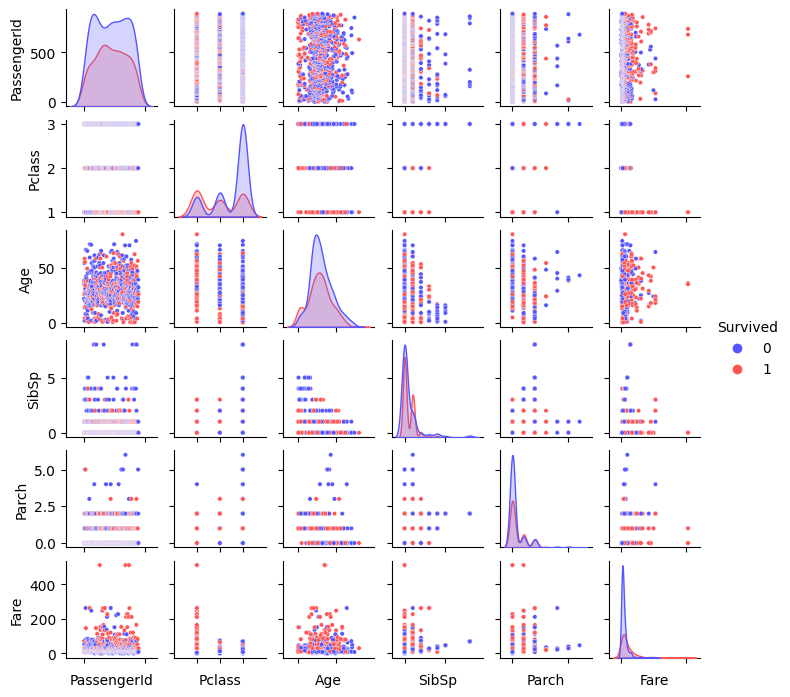

In [10]:
g = sns.pairplot(data=df_train, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

**¿Y respecto al puerto de salida?**

Estos aspectos de cómo la clase social y la edad afectaron al procentaje de supervivencia eran en un inicio esperables ya que conocíamos el funcionamiento de la sociedad de 1912. Pero, la primera de las sorpresas viene al darnos cuenta de que el puerto en el que se embarcó tiene muchísima diferencia en el porcentaje de supervivientes así que nos centramos en estudiar un poco mejor este hecho.

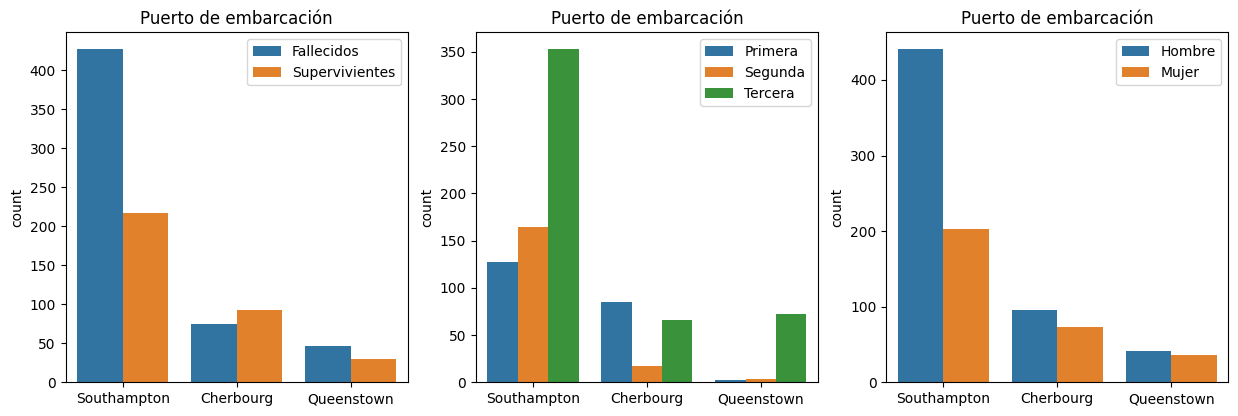

In [11]:
# Aquí marcamos que queremos una figura y de que tamaño.
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (2, 3)


# Ahora los tipos de embarque
plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(data=df_train, x="Embarked", hue="Survived")
plt.xticks([0,1,2],['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Puerto de embarcación')
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
#Clase social en cada tipo de embarque
plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(data=df_train, x="Embarked", hue="Pclass")
plt.xticks([0,1,2],['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Puerto de embarcación')
plt.legend(['Primera', 'Segunda', 'Tercera'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
# Por sexo en cada tipo de embarque
plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(data=df_train, x="Embarked", hue="Sex")
plt.xticks([0,1,2],['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Puerto de embarcación')
plt.legend(['Hombre', 'Mujer'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
plt.show()

Al analizar la proporción de las diferentes clases sociales y los sexos en cada uno de los puertos, podemos observar a qué se debe esta diferencia. Vemos que la mayoría de los pasajeros embarcados en Southampton eran de clase baja y principalmente hombres, hechos que habíamos visto anteriormente que afectaba en gran medida a la probabilidad de sobrevivir. Esto puede ser porque al ser el puerto de salida, la mayor parte de la tripulación subió en este puerto.

Por el contrario, el puerto de Cherbourg es el que mayor probabilidad de supervivencia tenía, esto es debido a que eran los que tenían mayor proporción de personas de clase alta.

# En busca del dato perdido

Para entrenar un modelo de inteligencia artificial no puede haber datos perdidos o que falten, así que tendremos que buscar cómo rellenar las columnas a las que nos faltan algunos de los datos.

Como la inmensa mayoría de las embarcos se hicieron en Southampton vamos a decir que los datos que faltan corresponden a este puerto, completando así los datos que faltan, cometiendo el menor error possible:

In [12]:
df_train['Embarked']=df_train['Embarked'].fillna('S')

También vamos a completar los valores de edad de los pasajeros en los que este dato falta, como no podemos saber que edad tenían, una forma de completar los datos es poner el valor más comun (aquel que más pasajeros tenían), siendo este valor la mediana.

In [13]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())

Respecto a la cabina, vemos que muchos de los datos faltan, esto puede tener algo de información importante ya que tal vez, aquellos sin cabina asignada sean de clases inferiores, que no tenían una cabina propiamente dicha. Por ello cambiaremos todos los valores que faltan por "NoCabina" para saber que eran pasajeros sin cabina.

In [14]:
df_train['Cabin']=df_train['Cabin'].fillna('NoCabina')

In [15]:
#Nos quedamos con solamente la primera letra de la cabina, que es la que marca el tipo de cabina que es
df_train['Cabin']=df_train['Cabin'].str.extract(r'([A-Z]{1,})')

In [16]:
#Comprobamos que ya no tenemos ningún dato vacío en la columna "Age" y "Embarked"
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ahora vemos que ya no nos falta ningún dato.

## La familia importa

Por último vamos a estudiar el efecto que tenía viajar solo o viajar en familia a la hora de sobrevivir, para ello vamos a hacer una cosa que en ciencia de datos se llama ingeniería de características. Para ello, creamos nuevos datos a partir de los que ya tenemos.

Lo que vamos a hacer es crear una variable llamada tamaño de la familia en la que cojamos el número de hermanos o esposas que está en la variable "SibSp" y sumarle el del número de hijos o padres que está en la variable "Parch".

In [17]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,0


Vamos a ver ahora el efecto que tenía el número de familiares en las posibilidades de supervivencia.

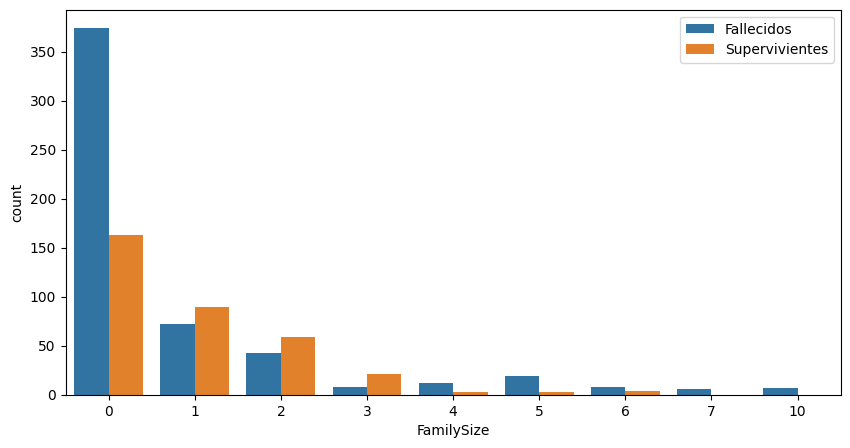

In [18]:
sns.countplot(data=df_train, x="FamilySize", hue="Survived")
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.show()

Vemos que el resultado muestra que aquellos que viajaban solos eran los que menor posibilidad de supervivencia tenían, aumentando la probabilidad de supervivencia cuando teníamos uno o unos pocos familiares (hasta 3) y volviendo a reducirse cuando el número de familiares era mayor.

**¿Cuál puede ser la explicación de que a partir de 3 familiares era menor tu prosibilidad de supervivencia?**

Tal vez las familias con mayor número de personas eran las de clases más bajas o aquellas con muchos hijos, si no encontraban un bote donde cupieran todos, prefirieron no separarse.

# Señora o señorita, ¿a caso importa?

Otro aspecto que podría ser importante es si las mujeres estaban casadas o solteras, dato que podemos obtener a partir del nombre ya que algunas de ellas tienen el prefijo Mr, Mrs, Miss o Ms en su nombre, así que intentamos extraer esta información de los nombres.

In [19]:
import re
df_train['Status']=df_train['Name'].str.extract(r'( M[a-z]{1,}\.)')
#Rellenamos los datos que faltan con el más común
df_train['Status']=df_train['Status'].fillna("Mr")

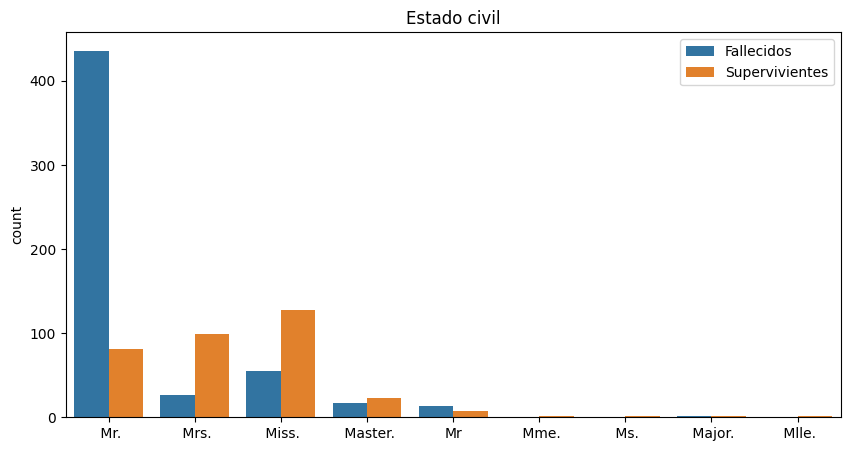

In [20]:
#Ahora vemos como afecta el estado civil a la supervivencia
sns.countplot(data=df_train, x="Status", hue="Survived")
plt.title('Estado civil')
plt.legend(['Fallecidos', 'Supervivientes'], title='')
plt.xticks(rotation=0)
plt.xlabel("")
plt.show()

Vemos que ligeramente había mayor posibilidad de sobrevivir si eras una mujer casada que si eras una mujer soltera, seguramente debido al efecto que ya hemos visto de la familia en el porcentaje de supervivencia.

## Preparación final de los datos

La mayoría de los modelos de inteligencia artificial no son capaces de usar variables que contengan texto, tenemos que codificar todo como números, eso hace que tengamos que preparar un poco más nuestros datos antes de poder diseñar nuestro modelo de inteligencia artificial.

In [21]:
#Columnas discretas
Columnas_texto=['Sex', 'Cabin', 'Embarked', 'Status', 'Pclass']
#Columnas numéricas
Columnas_numericas=['Age','SibSp','Parch','Fare','FamilySize']
#Variables que no usaremos
No_usadas=['PassengerId', "Name", "Ticket"]
#Variable a predecir
Predecir=["Survived"]

In [22]:
#Separamos los datos que vamos a predecir
y_train=df_train.pop("Survived")

In [23]:
#Ahora usamos un código para cambiar las variables en texto a números
#Con este también estadarizamos las variables numéricas para que tengan valores parecidos
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#Pipeline para el procesamiento de variables categóricas
categoricas= Pipeline([('onehot', OneHotEncoder())])
#Pipeline para el procesamiento de variables numéricas
numericas = Pipeline([('scaler', StandardScaler())])

titanic_transformacion = ColumnTransformer(
    transformers=[
        ('num', numericas, Columnas_numericas),
        ('cat', categoricas, Columnas_texto)])

In [25]:
titanic_transformacion.fit(df_train)
nombre_nuevas_variables=titanic_transformacion.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(Columnas_texto).tolist()
nombres_columnas=Columnas_numericas+nombre_nuevas_variables
df_transformada=pd.DataFrame(titanic_transformacion.transform(df_train), columns=nombres_columnas)

Nuestros datos ya están listos para preparar el modelo.

## Enseñando a tu primer modelo

Primero nos tenemos que guardar una pequeña cantidad de los datos para poder usarlos después para ver cómo de bueno es nuestro modelo.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_transformada, y_train, test_size=0.33, random_state=1)

Creamos el modelo de Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100)

Entrenamos el modelo con nuestros datos

In [28]:
modelo = modelo.fit(X_train, y_train)
score = modelo.score(X_test, y_test)
"La precisión del modelo es: {0}".format(score)

'La precisión del modelo es: 0.7593220338983051'

# Aprende de tu modelo

Una vez entrenado el modelo podemos estudiar qué ha aprendido el de los datos y ve en que basa sus decisiones.

In [30]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


In [36]:
import shap
shap.initjs()

In [32]:
y_predicho = modelo.predict(X_test)
#Nos quedaremos con las filas para las que ha predicho un valor mayor y menor de produccion
max_idx=pd.DataFrame(y_predicho)[0].nlargest(1).index.to_list()
min_idx=pd.DataFrame(y_predicho)[0].nsmallest(1).index.to_list()

In [33]:
muestras=X_test.iloc[max_idx+min_idx]

In [34]:
explainer = shap.TreeExplainer(modelo)
sampleID=muestras.index

In [37]:
muestra_elegida = muestras.loc[862]
df_shap=pd.DataFrame(muestra_elegida).T
shap_values = explainer.shap_values(df_shap)
#Mostramos las 10 variables con mayor importancia
prueba_shap=pd.DataFrame(shap_values[0])
prueba_shap.columns=nombres_columnas
shap.force_plot(explainer.expected_value[0], shap_values[0], df_shap)

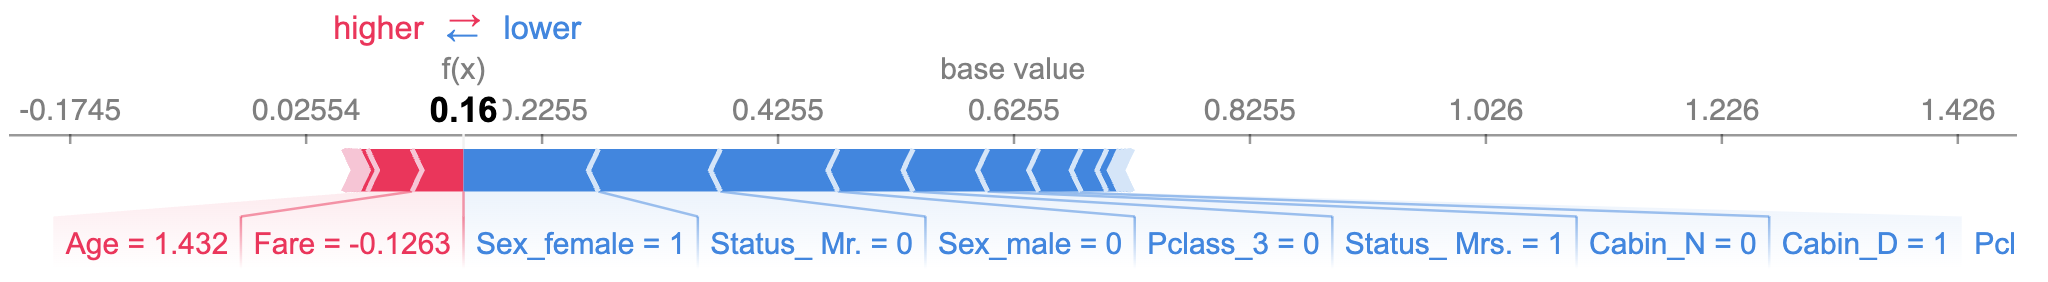

In [39]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/titanic/1.png')

In [ ]:
muestra_elegida = muestras.loc[223]
df_shap=pd.DataFrame(muestra_elegida).T
shap_values = explainer.shap_values(df_shap)
#Mostramos las 10 variables con mayor importancia
prueba_shap=pd.DataFrame(shap_values[0])
prueba_shap.columns=nombres_columnas
shap.force_plot(explainer.expected_value[0], shap_values[0], df_shap)

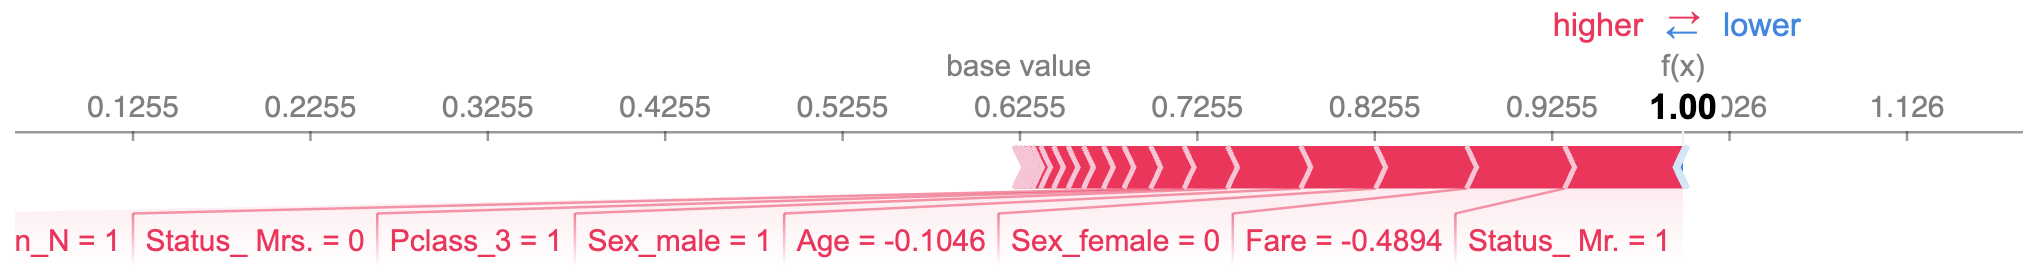

In [40]:
Image(filename='/content/drive/MyDrive/titanic/2.png')

# Crea tu propio modelo

Ahora puedes probar tu a entrenar tu modelo, siguiendo un sistema muy parecido al que te acabo de enseñar, algunos ejemplos son los siguientes.

In [41]:
#SVM
from sklearn.svm import SVC
#Regresión logística
from sklearn.linear_model import LogisticRegression
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#k-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
#Árboles de decisión
from sklearn.tree import DecisionTreeClassifier

Estos son solo unos ejemplos, aquí podéis ver muchos más [Modelos sklearn](https://scikit-learn.org/stable/supervised_learning.html)

In [42]:
#Escribe aquí tu código basandote en lo que he hecho yo con el modelo anterior






# Crea tus propias variables

**¿Se te ocurre alguna otra manera de generar variables que pudieran ser interesantes a partir de nuestros datos?**

Prueba a generarlas y ver si mejoran tu modelo.

# **Algo más complejo**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                352       
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 dropout_6 (Dropout)         (None, 11)                0         
                                                                 
 dense_17 (Dense)            (None, 11)                132       
                                                                 
 dropout_7 (Dropout)         (None, 11)                0         
                                                                 
 dense_18 (Dense)            (None, 5)                 60        
                                                                 
 dense_19 (Dense)            (None, 1)                

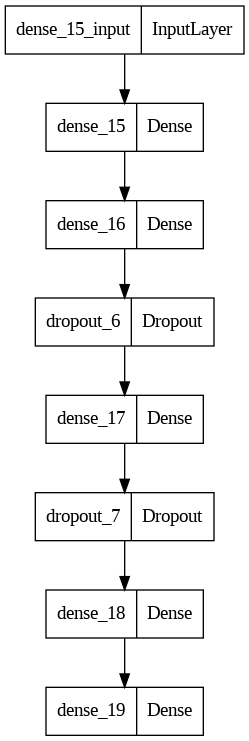

In [55]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import plot_model
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=31, units=11, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()
plot_model(classifier)

In [56]:
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,
    validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/100
54/54 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.6194 - val_loss: 0.6837 - val_accuracy: 0.7167
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.6194 - val_loss: 0.6703 - val_accuracy: 0.7167
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6194 - val_loss: 0.6315 - val_accuracy: 0.7167
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.6194 - val_loss: 0.5401 - val_accuracy: 0.7167
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.6493 - val_loss: 0.4802 - val_accuracy: 0.8000
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.8209 - val_loss: 0.4492 - val_accuracy: 0.8000
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.8265 - val_loss: 0.4721 - val_accuracy: 0.7833
Epoch 8/100
5

In [59]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(X_test)
y_pred = y_pred.round()
precision = precision_score(y_test, y_pred)
"La precisión del modelo es: {0}".format(precision)

10/10 [==============================] - 0s 2ms/step


'La precisión del modelo es: 0.7652173913043478'

Aquí tenéis un ejemplo muy parecido donde con un poco de ingeniería de características llegan al 80% de precisión
https://www.kaggle.com/code/saife245/titanic-deep-learning-model-with-80-accuracy/notebook